W_best: [ 3.00009091  0.50009091]
E_min: 1.25115363636
[ 1.96214823  0.60525594]
[ 2.06131889  0.91647467]
[ 2.14402948  0.37023981]
[ 2.32422107  0.50434556]
[ 2.51600628  0.72474392]
[ 2.64526664  0.45832754]
[ 2.77729052  0.46131071]
[ 2.89498477  0.59911106]
[ 2.9602294  0.4840414]
[ 3.00951178  0.45641898]


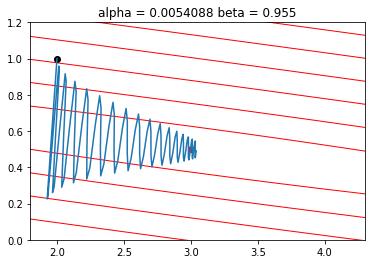

In [28]:
%matplotlib inline
import matplotlib.pylab as plt
import time
import numpy as np
from notes_utilities import pnorm_ball_line
from IPython import display

# initialize data
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
N = len(x)

# create the design matrix
A = np.vstack((np.ones(N), x)).T

# calculate values using numpy (np) 
w_best, E, rank, s = np.linalg.lstsq(A, y)
print("W_best:", w_best)

# calculate the min value using w_best
err = y-A.dot(w_best) 
E_min = np.sum(err**2)/N
print("E_min:", E_min)

def draw_pnorm():
    for i in range(10):
        ln = pnorm_ball_line(mu=w_best, A = i*4*np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)
        plt.gca().add_line(ln) 

def inspect_momentum(alpha = 0.005, beta = 0.97):
    # set start position for w
    w0 = np.array([2., 1.])
    w = w0.copy()
    p = np.zeros(2)
    
    # set bounds and draw title
    plt.title('alpha = '+ str(alpha) + ' beta = ' +str(beta))
    plt.xlim((1.8,4.3))
    plt.ylim((0,1.2))
    
    # draw start position
    plt.plot(w0[0],w0[1],'ko')
    
    # draw best position
    plt.plot(w_best[0],w_best[1],'ro')
    
    EPOCHS = 100
    # create a 2 * EPOCHS array
    W = np.zeros((2,EPOCHS))

    for epoch in range(EPOCHS):
        # Error
        err = y-A.dot(w)
        W[:,epoch] = w
        
        # Mean square error
        E = np.sum(err**2) / N

        # Gradient
        dE = -2. * A.T.dot(err) / N
        p = dE + beta * p

        if epoch%10 == 1: 
            #print(epoch,':',E)
            print(w)    

        # Perfom one descent step
        w = w - alpha * p 
    return W

# run solution
draw_pnorm()
W = inspect_momentum(alpha=0.0054088, beta=0.955)

#draw solution
plt.plot(W[0,:],W[1,:])
plt.show()